# ML Zoomcamp Homework 6

In [1]:
#!wget -O ../data/housing.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

## Importing

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from tqdm import tqdm
# plots
import matplotlib.pyplot as plt

## Loading and Preparing Data

In [3]:
cols = [
    'latitude',

    'longitude',

    'housing_median_age',

    'total_rooms',

    'total_bedrooms',

    'population',

    'households',

    'median_income',

    'median_house_value',

    'ocean_proximity'
    
]

In [4]:
df = pd.read_csv('../data/housing.csv')

In [5]:
df = df[cols].copy()

In [6]:
df.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [7]:
df.fillna(0, inplace=True)

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [12]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [13]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [14]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2

In [17]:
rf = RandomForestRegressor(n_estimators=10, random_state = 1, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [18]:
y_preds = rf.predict(X_val)

print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_preds)))

RMSE:  0.24438872286149413


## Question 3

In [19]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs = -1)
    rf.fit(X_train, y_train)

    y_preds = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_preds))
    
    scores.append((n, rmse))

100%|███████████████████████████████████████████| 20/20 [02:51<00:00,  8.59s/it]


In [20]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [21]:
df_scores

,n_estimators,rmse
0,10,0.244389
1,20,0.238426
2,30,0.235029
3,40,0.234747
4,50,0.234323
5,60,0.233898
6,70,0.233797
7,80,0.233557
8,90,0.233156
9,100,0.232660


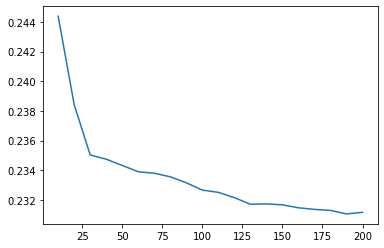

In [22]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

## Question 4

In [23]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs = -1)
        rf.fit(X_train, y_train)

        y_preds = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_preds))

        scores.append((d, n, rmse)) 

In [24]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

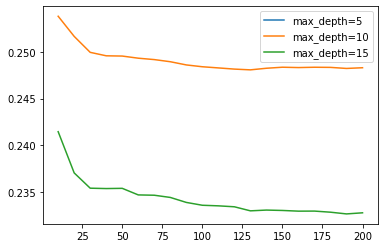

In [25]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

## Question 5

In [26]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state = 1, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [28]:
df_importances = pd.DataFrame({
    'feature': dv.get_feature_names(),
    'importance': rf.feature_importances_
})

df_importances.sort_values('importance', ascending=False)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,importance
4,median_income,0.349465
6,ocean_proximity=INLAND,0.321803
2,latitude,0.105571
3,longitude,0.094585
1,housing_median_age,0.034454
10,population,0.028804
12,total_rooms,0.022658
11,total_bedrooms,0.018343
0,households,0.016889
9,ocean_proximity=NEAR OCEAN,0.003834


## Question 6

In [ ]:
import xgboost as xgb

In [ ]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
df_score3 = parse_xgb_output(output)

In [ ]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
df_score1 = parse_xgb_output(output)

In [ ]:
plt.plot(df_score3.num_iter, df_score3.val_auc, label='eta=0.3')
plt.plot(df_score1.num_iter, df_score1.val_auc, label='eta=0.1')
plt.legend()